# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1734461597193.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Open,High,Low
0,12/16/2024,6074.08,6063.79,6085.19,6059.14
1,12/13/2024,6051.09,6068.17,6078.58,6035.77
2,12/12/2024,6051.25,6074.29,6079.68,6051.25
3,12/11/2024,6084.19,6060.15,6092.59,6060.15
4,12/10/2024,6034.91,6057.59,6065.40,6029.89
...,...,...,...,...,...
2521,12/23/2014,2082.17,2081.48,2086.73,2079.77
2522,12/22/2014,2078.54,2069.28,2078.76,2069.28
2523,12/19/2014,2070.65,2061.04,2077.85,2061.03
2524,12/18/2014,2061.23,2018.98,2061.23,2018.98


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2526.000000,2526.000000,2526.000000,2526.000000
mean,3335.624834,3326.919652,3344.572015,3307.990523
std,1075.290867,1092.342190,1097.780366,1086.846002
min,1829.080000,0.000000,0.000000,0.000000
25%,2413.450000,2414.782500,2429.490000,2397.952500
50%,2991.925000,2993.885000,3004.030000,2976.470000
75%,4192.652500,4191.550000,4212.900000,4172.960000
max,6090.270000,6089.030000,6099.970000,6079.980000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2516.000000,2516.000000,2516.000000,2516.000000
mean,3340.695652,3340.142703,3357.865227,3321.138339
std,1074.401640,1074.137514,1079.471588,1068.759988
min,1829.080000,1833.400000,1847.000000,1810.100000
25%,2425.442500,2425.825000,2434.662500,2409.210000
50%,2995.905000,2996.660000,3006.770000,2980.400000
75%,4194.347500,4195.835000,4214.407500,4175.335000
max,6090.270000,6089.030000,6099.970000,6079.980000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2525
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2516 non-null   object 
 1   Close/Last  2516 non-null   float64
 2   Open        2516 non-null   float64
 3   High        2516 non-null   float64
 4   Low         2516 non-null   float64
dtypes: float64(4), object(1)
memory usage: 117.9+ KB


In [5]:
df.shape

(2516, 5)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

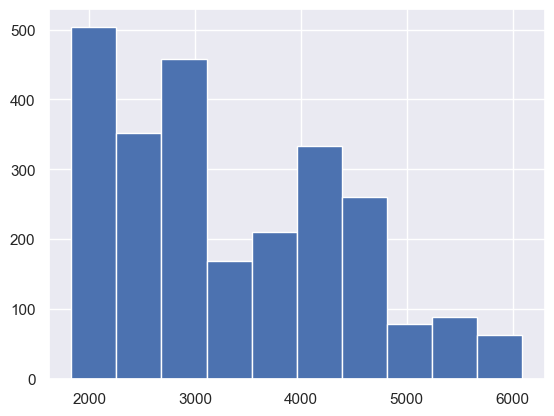

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

6074.08

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

3340.6956518283023

In [10]:
close_sd = df['Close/Last'].std()
close_sd

1074.4016403238536

In [11]:
sigma1 = close_mean + close_sd
sigma1

4415.097292152156

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

5489.49893247601

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

6026.699752637936

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2525
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2516 non-null   datetime64[ns]
 1   Close/Last  2516 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2014-12-17 to 2024-12-16')

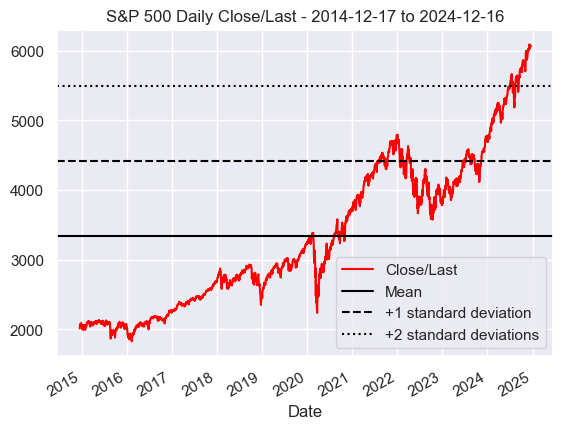

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2014-12-17 to 2024-12-16')

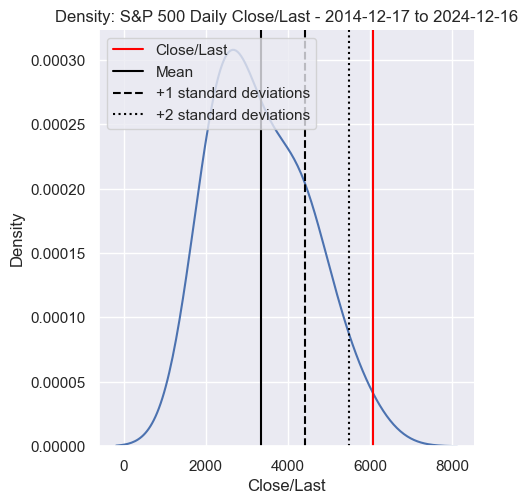

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_current, color=c, label='Close/Last')
plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

2.544099194922843

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results